# Pandas Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
d = pd.DataFrame(np.random.randn(4,5),columns=['data1','data2','data3','data4','data5'])
d

,data1,data2,data3,data4,data5
0,-0.467461,-0.545414,-0.312591,-0.532977,1.359514
1,-1.111833,-0.221467,0.735285,1.347927,0.984279
2,0.566694,0.289772,0.446711,-0.570156,-0.227539
3,0.841353,-0.916400,0.419973,-1.052865,1.002156


# Line plot

<AxesSubplot:>

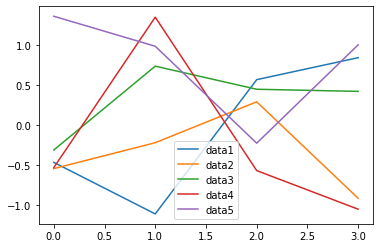

In [8]:
d.plot()

<AxesSubplot:title={'center':'Pandas plotting'}>

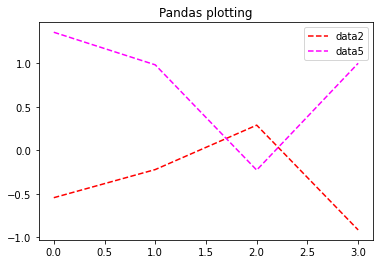

In [13]:
d[['data2','data5']].plot(color=['red','magenta'],linestyle='--',
                         title='Pandas plotting')

In [15]:
# drop one columns
d.drop(columns=['data5'],inplace=True)

In [16]:
d

,data1,data2,data3,data4
0,-0.467461,-0.545414,-0.312591,-0.532977
1,-1.111833,-0.221467,0.735285,1.347927
2,0.566694,0.289772,0.446711,-0.570156
3,0.841353,-0.916400,0.419973,-1.052865


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

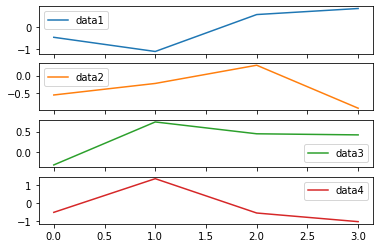

In [19]:
d.plot(subplots=True) # to separate plot for each column use subplots

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

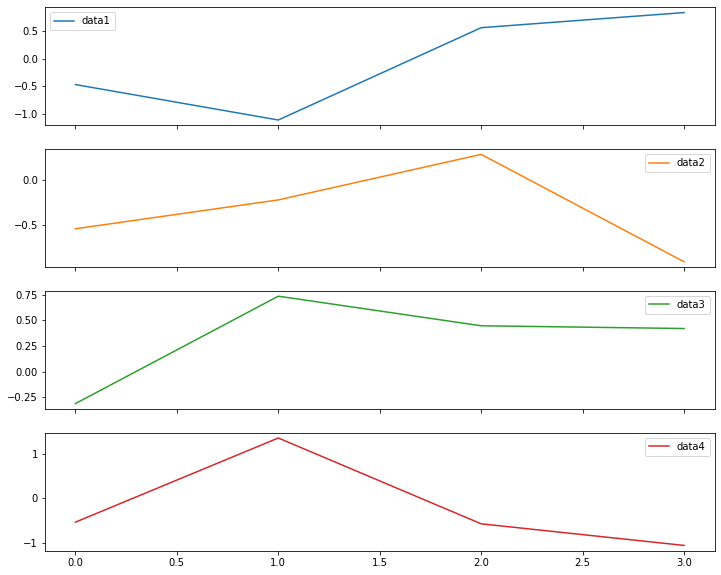

In [20]:
# adjust figsize
d.plot(subplots=True,figsize=(12,10)) 

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

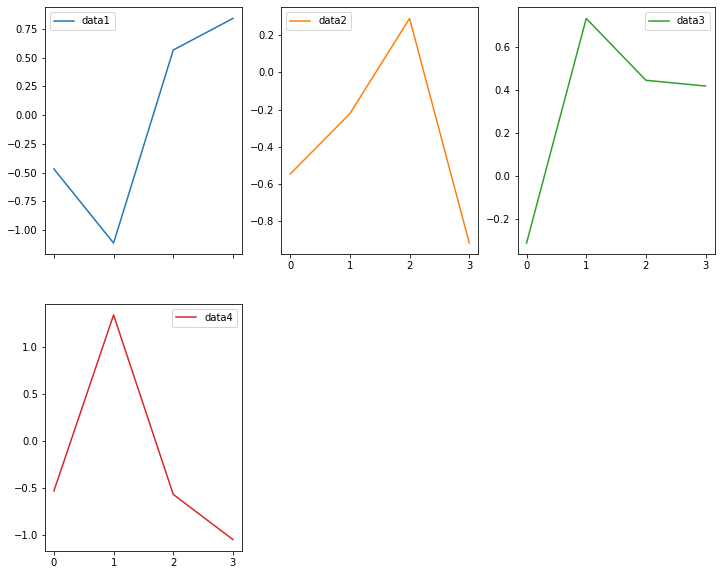

In [22]:
# change layout
d.plot(subplots=True,figsize=(12,10),layout=(2,3)) 

<AxesSubplot:xlabel='data2'>

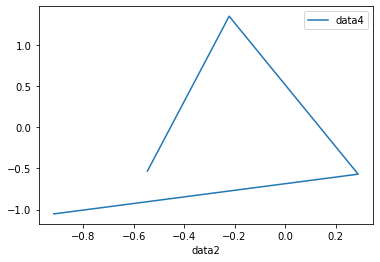

In [24]:
# column vs column
d.plot(x='data2',y='data4')

## Data Selection using loc and iloc

In [26]:
d[:2]

,data1,data2,data3,data4
0,-0.467461,-0.545414,-0.312591,-0.532977
1,-1.111833,-0.221467,0.735285,1.347927


In [33]:
# loc: label based selection
d.loc[::-1,'data2':'data4'] #in loc stop is inclusive

,data2,data3,data4
3,-0.916400,0.419973,-1.052865
2,0.289772,0.446711,-0.570156
1,-0.221467,0.735285,1.347927
0,-0.545414,-0.312591,-0.532977


In [35]:
d.loc[:2]

,data1,data2,data3,data4
0,-0.467461,-0.545414,-0.312591,-0.532977
1,-1.111833,-0.221467,0.735285,1.347927
2,0.566694,0.289772,0.446711,-0.570156


In [38]:
#d.loc[:,['data1','data4']]
d.loc[:,'data1'::3]

,data1,data4
0,-0.467461,-0.532977
1,-1.111833,1.347927
2,0.566694,-0.570156
3,0.841353,-1.052865


In [40]:
# iloc: index based location
d.iloc[:,1:3] #stop is exclusive

,data2,data3
0,-0.545414,-0.312591
1,-0.221467,0.735285
2,0.289772,0.446711
3,-0.916400,0.419973


In [42]:
d.iloc[:,1::2]

,data2,data4
0,-0.545414,-0.532977
1,-0.221467,1.347927
2,0.289772,-0.570156
3,-0.916400,-1.052865


In [47]:
d.iloc[:,:0:-1]

,data4,data3,data2
0,-0.532977,-0.312591,-0.545414
1,1.347927,0.735285,-0.221467
2,-0.570156,0.446711,0.289772
3,-1.052865,0.419973,-0.916400


In [49]:
d.iloc[:,3:0:-1]

,data4,data3,data2
0,-0.532977,-0.312591,-0.545414
1,1.347927,0.735285,-0.221467
2,-0.570156,0.446711,0.289772
3,-1.052865,0.419973,-0.916400


In [50]:
d.iloc[:,-1:-4:-1]

,data4,data3,data2
0,-0.532977,-0.312591,-0.545414
1,1.347927,0.735285,-0.221467
2,-0.570156,0.446711,0.289772
3,-1.052865,0.419973,-0.916400


In [53]:
d.iloc[:,[3,2,1]]

,data4,data3,data2
0,-0.532977,-0.312591,-0.545414
1,1.347927,0.735285,-0.221467
2,-0.570156,0.446711,0.289772
3,-1.052865,0.419973,-0.916400


# Bar plot

<AxesSubplot:>

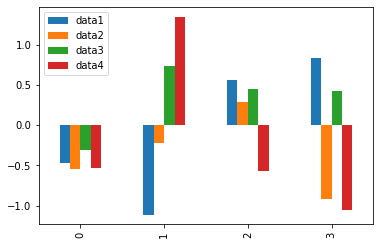

In [54]:
d.plot(kind='bar')

<AxesSubplot:>

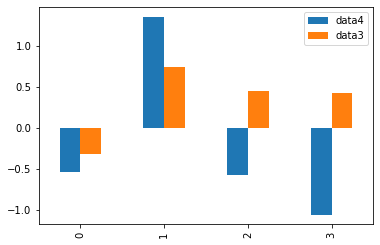

In [56]:
d.iloc[:,[3,2]].plot(kind='bar')

### Pie

In [58]:
d.plot(kind='pie',subplots=True)

ValueError: pie plot doesn't allow negative values

<AxesSubplot:title={'center':'Sample'}, ylabel='central'>

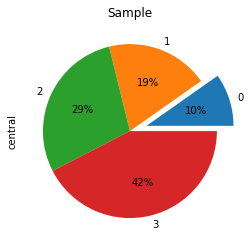

In [67]:
d2 = pd.Series([230,450,677,1000],name='central')
d2.plot(kind='pie',title='Sample',autopct='%.f%%',explode=[0.2,0,0,0])

In [64]:
d2 = pd.Series([230,450,677,1000])
d2

0     230
1     450
2     677
3    1000
dtype: int64

<AxesSubplot:xlabel='data1', ylabel='data2'>

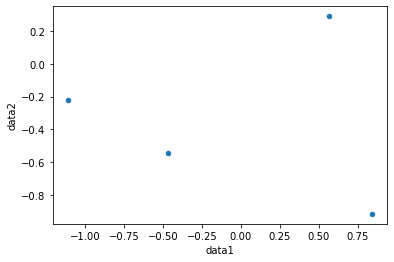

In [70]:
d.plot(x = 'data1',y='data2',kind='scatter')

## Multiple plot using subplot


Text(0.5, 0.98, '4 in one plot')

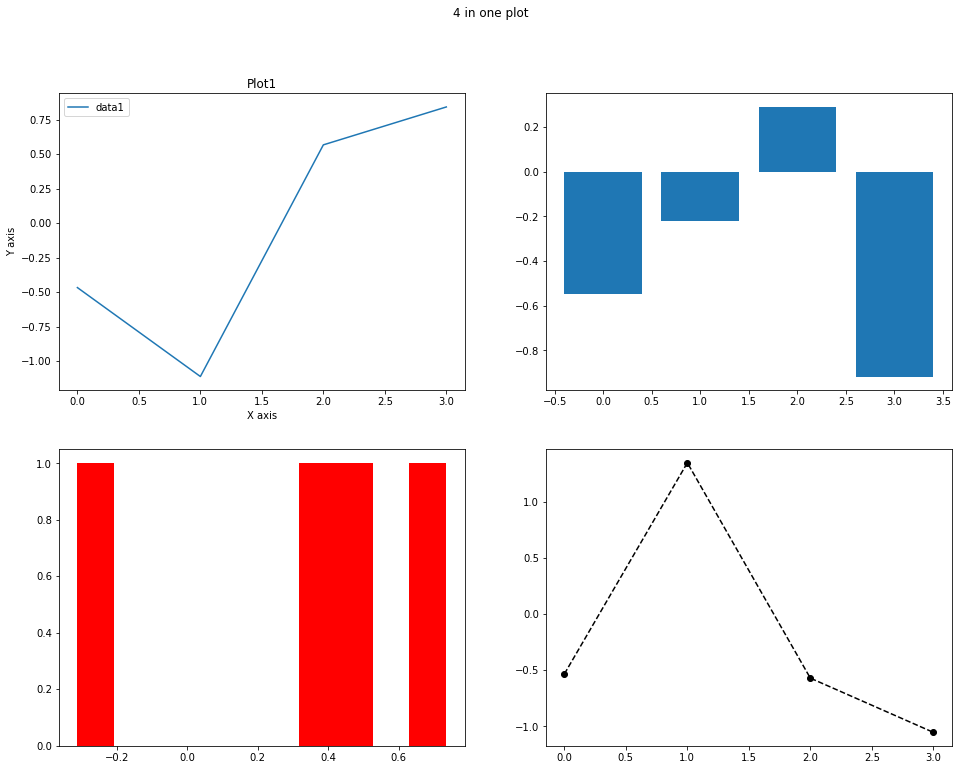

In [80]:
# 2x2 layout== 4 plots
plt.figure(figsize=(16,12))

plt.subplot(221)
plt.plot(d['data1'],label='data1')
plt.title('Plot1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

plt.subplot(222)
plt.bar(range(4),d['data2'])

plt.subplot(223)
plt.hist(d['data3'],color='red')

plt.subplot(224)
plt.plot(d['data4'],'--ko')

plt.suptitle('4 in one plot')